Epoch 1/100
391/391 - 44s - loss: 1.6369 - accuracy: 0.4010 - val_loss: 1.2998 - val_accuracy: 0.5476 - 44s/epoch - 113ms/step
Epoch 2/100
391/391 - 45s - loss: 1.2389 - accuracy: 0.5572 - val_loss: 1.1096 - val_accuracy: 0.6201 - 45s/epoch - 115ms/step
Epoch 3/100
391/391 - 45s - loss: 1.0706 - accuracy: 0.6230 - val_loss: 0.9426 - val_accuracy: 0.6793 - 45s/epoch - 116ms/step
Epoch 4/100
391/391 - 47s - loss: 0.9631 - accuracy: 0.6615 - val_loss: 0.8657 - val_accuracy: 0.7023 - 47s/epoch - 119ms/step
Epoch 5/100
391/391 - 45s - loss: 0.9014 - accuracy: 0.6833 - val_loss: 0.8086 - val_accuracy: 0.7233 - 45s/epoch - 115ms/step
Epoch 6/100
391/391 - 45s - loss: 0.8392 - accuracy: 0.7057 - val_loss: 0.8021 - val_accuracy: 0.7229 - 45s/epoch - 116ms/step
Epoch 7/100
391/391 - 46s - loss: 0.8009 - accuracy: 0.7195 - val_loss: 0.7462 - val_accuracy: 0.7466 - 46s/epoch - 117ms/step
Epoch 8/100
391/391 - 47s - loss: 0.7625 - accuracy: 0.7330 - val_loss: 0.7170 - val_accuracy: 0.7531 - 47s/epo

391/391 - 45s - loss: 0.2761 - accuracy: 0.9012 - val_loss: 0.7184 - val_accuracy: 0.7916 - 45s/epoch - 115ms/step
Epoch 66/100
391/391 - 45s - loss: 0.2791 - accuracy: 0.9022 - val_loss: 0.7157 - val_accuracy: 0.7894 - 45s/epoch - 114ms/step
Epoch 67/100
391/391 - 45s - loss: 0.2746 - accuracy: 0.9036 - val_loss: 0.7264 - val_accuracy: 0.7912 - 45s/epoch - 114ms/step
Epoch 68/100
391/391 - 45s - loss: 0.2740 - accuracy: 0.9035 - val_loss: 0.7062 - val_accuracy: 0.7966 - 45s/epoch - 114ms/step
Epoch 69/100
391/391 - 45s - loss: 0.2726 - accuracy: 0.9018 - val_loss: 0.7211 - val_accuracy: 0.7929 - 45s/epoch - 114ms/step
Epoch 70/100
391/391 - 45s - loss: 0.2658 - accuracy: 0.9049 - val_loss: 0.7028 - val_accuracy: 0.7944 - 45s/epoch - 114ms/step
Epoch 71/100
391/391 - 45s - loss: 0.2704 - accuracy: 0.9030 - val_loss: 0.7113 - val_accuracy: 0.7963 - 45s/epoch - 114ms/step
Epoch 72/100
391/391 - 45s - loss: 0.2740 - accuracy: 0.9036 - val_loss: 0.7052 - val_accuracy: 0.7954 - 45s/epoch - 

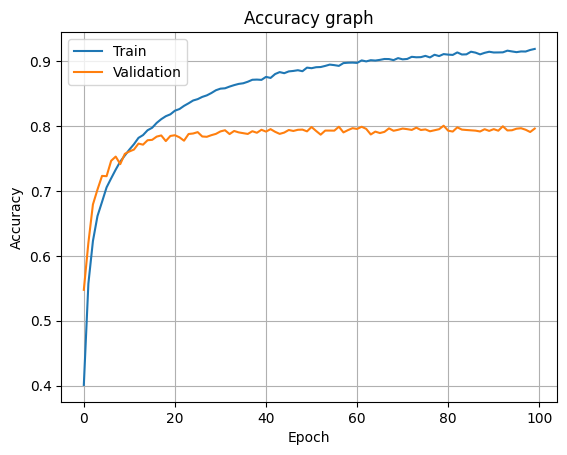

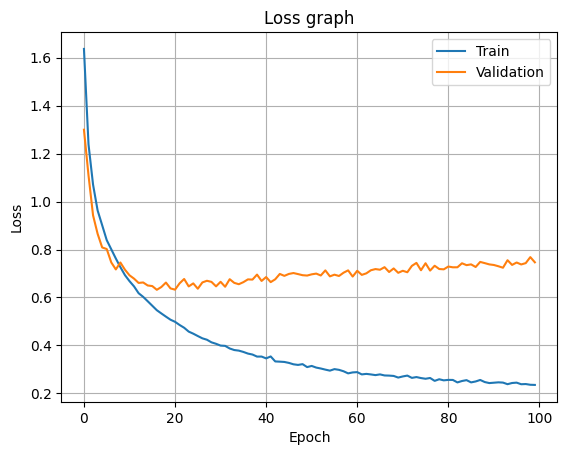

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data() #CIFAR-10 데이터셋을 읽어온다.
x_train=x_train.astype(np.float32)/255.0 #원래의 데이터형인 unit8을 실수 연산이 가능하도록 float32로 전환
x_test=x_test.astype(np.float32)/255.0 # 255로 나누어[0,255] 범위를 [0,1]로 변환
y_train=tf.keras.utils.to_categorical(y_train,10)#0~10 사이의 정수로 표현된 훈련,테스트코드를
y_test=tf.keras.utils.to_categorical(y_test,10) #원핫 코드로 변환(부류가 10개)

#Functional API
input = Input(shape=(32,32,3)) #입력 영상을 지정한다.
x1 = Conv2D(32,(3,3),activation='relu')(input) # 컨볼루션층을 C
x1 = Conv2D(32,(3,3),activation='relu')(x1) #연달아 2개 쌓는다. C
x1 = MaxPooling2D(pool_size=(2,2))(x1) #풀링층을 추가한다. P
x1 = Dropout(0.25)(x1) #드롭아웃 픙을 추가한다. D  (위 3행부터 지금까지 C-C-P-D 구조를 구축)
x2 = Conv2D(64,(3,3),activation='relu')(x1) # 한번더 C
x2 = Conv2D(64,(3,3),activation='relu')(x1) #C
x2 = MaxPooling2D(pool_size=(2,2))(x2) #P
x2 = Dropout(0.25)(x2) #D 구조를 추가.
x3 = Flatten()(x2) #특징 맵을 펼친다.
x3 = Dense(units=512,activation='relu')(x3) #완전 연결 FC,
x3 = Dropout(0.5)(x3) # 드롭아웃 D, 
output = Dense(units=10,activation='softmax')(x3) #완전연결 층 FC 을 추가(입력영상 input이 x1,x2,x3을 거쳐 output에 저장)
model = Model(input,output)# 입력으로 input 과 출력으로 output을 사용하여 모델을 구성
# 최종적으로 C-C-P-D-C-C-P-D-DC-D-FC 구조의 컨볼루션 신경망 구조를 완성

#신경망 학습
#앞서 구축한 신경망 모델 학습 (항상 compile과fit함수가 쌍으로 등장)
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
#학습 결과를 hist 객체에 저장
hist=model.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)
#성능 측정
res=model.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

import matplotlib.pyplot as plt
#matplotlib 모듈을 임포트 하여 정확률과 손실 함수 추세를 그래프로 그린다.
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()